In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\kyana\Downloads\globalterrorismdb_0718dist.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)

In [6]:
# Display the first few rows of the dataset for initial assessment
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

approxdate    172452
resolution    179471
provstate        421
city             435
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64

In [14]:
df=df.fillna(0)

In [18]:
df.isnull().sum()

eventid       0
iyear         0
imonth        0
iday          0
approxdate    0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 135, dtype: int64

In [21]:
df.tail(20)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181671,201712310004,2017,12,31,0,0,0,95,Iraq,10,...,Casualty numbers conflict across sources. Foll...,"""Islamic State attack leaves thirteen civilian...","""3 people killed in IS attack in central Iraq,...","""Daesh gunmen kill 3 in northern Iraq: Police,...",START Primary Collection,0,1,0,1,0
181672,201712310005,2017,12,31,0,0,0,92,India,6,...,"The victims included Kuldip Roy, Taufail Ahmed...","""Three soldiers killed in Indian-administered ...","""Fidayeen used armour-piercing bullets in Leth...","""Kashmir gunbattle ends after 16 hrs, body of ...",START Primary Collection,1,1,0,1,0
181673,201712310006,2017,12,31,0,0,0,4,Afghanistan,6,...,Casualty numbers conflict across sources. Foll...,"""Death toll from funeral blast in eastern Afgh...","""The Latest: Toll from Afghan funeral bombing ...","""Bombing Kills At Least 17 At Funeral In Easte...",START Primary Collection,0,1,0,1,0
181674,201712310007,2017,12,31,0,0,0,95,Iraq,10,...,0,"""Five IS militants killed as paramilitary troo...","""1,262 Killed in Iraq During December,"" Antiwa...",0,START Primary Collection,0,1,0,1,0
181675,201712310008,2017,12,31,0,0,0,182,Somalia,11,...,0,"""Somalia: Al-Shabab says 5 AU soldiers dead in...","""Somalia: Fifteen Police Officers Complete Tra...","""Two die in Mogadishu bomb attack,"" Xinhua Gen...",START Primary Collection,0,1,1,1,0
181676,201712310009,2017,12,31,0,0,0,4,Afghanistan,6,...,The victims included police commander Faqeer A...,"""Commander among 5 ALP members killed in Logar...","""Media Highlights on Afghanistan 1 January 201...",0,START Primary Collection,0,0,0,0,0
181677,201712310010,2017,12,31,0,0,0,160,Philippines,5,...,0,"""3 slain in Maguindanao roadside bombings,"" Ph...","""BIFF gunmen torch abandoned houses in Maguind...","""Philippines: Highlights of Terrorist, Counter...",START Primary Collection,0,0,0,0,0
181678,201712310011,2017,12,30,0,0,0,160,Philippines,5,...,"The victims included the owner, Norodin Pacaln...","""Cops hunt North Cotabato bombers,"" Philippine...","""Philippines: Highlights of Terrorist, Counter...",0,START Primary Collection,-9,-9,0,-9,0
181679,201712310012,2017,12,31,0,0,0,95,Iraq,10,...,0,"""13 IS militants killed in attack on paramilit...",0,0,START Primary Collection,0,1,0,1,0
181680,201712310013,2017,12,31,0,0,0,182,Somalia,11,...,0,"""Somalia's al-Shabab fires mortars at Ethiopia...","""Somalia: Al-Shabaab Militants Shell Ethiopian...",0,START Primary Collection,0,1,1,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [23]:
# Convert all object type columns to categorical
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [26]:
# Convert all object type columns to categorical
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Label encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='category').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [27]:
# Normalize numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [28]:
df.describe()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,181691.000000,1.816910e+05,181691.000000,1.816910e+05,181691.000000,1.816910e+05,...,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,1.816910e+05,1.816910e+05,1.816910e+05,181691.000000
mean,2.097898e-14,3.947012e-15,2.502861e-18,-4.552079e-17,2187.725584,-1.540824e-17,1847.687778,-8.697443e-17,102.852321,3.629149e-17,...,13923.412976,56268.131498,48805.285545,31725.736052,12.442713,4.380007e-18,-1.694515e-16,-4.536436e-18,-3.261541e-17,13522.930894
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,269.510135,1.000003e+00,117.775836,1.000003e+00,58.050417,1.000003e+00,...,3945.351840,28239.582211,19499.560520,9283.256911,3.271745,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,2553.726485
min,-2.466545e+00,-2.461575e+00,-1.908712e+00,-1.759202e+00,0.000000,-2.179453e-01,0.000000,-1.138366e+00,0.000000,-2.100272e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.807935e-01,-9.781034e-01,-1.599071e+01,-1.077321e+00,0.000000
25%,-8.812255e-01,-8.777925e-01,-7.281767e-01,-8.515574e-01,2244.000000,-2.179453e-01,1859.000000,-4.800860e-01,66.000000,-7.366667e-01,...,15429.000000,29345.500000,35447.500000,36090.000000,13.000000,-9.807935e-01,-9.781034e-01,-1.583412e-01,-1.077321e+00,14306.000000
50%,4.764165e-01,4.797356e-01,-1.379092e-01,-5.736817e-02,2244.000000,-2.179453e-01,1859.000000,-3.021726e-01,87.000000,-3.957654e-01,...,15429.000000,63514.000000,62263.000000,36090.000000,13.000000,-9.807935e-01,-9.781034e-01,-1.583412e-01,8.411192e-01,14306.000000
75%,8.579231e-01,8.568267e-01,7.474921e-01,8.502766e-01,2244.000000,-2.179453e-01,1859.000000,2.493590e-01,140.000000,9.678401e-01,...,15429.000000,83988.000000,62263.000000,36090.000000,14.000000,1.000043e+00,9.627484e-01,-1.583412e-01,8.411192e-01,14306.000000
max,1.087358e+00,1.083081e+00,1.632893e+00,1.757921e+00,2244.000000,4.588306e+00,1859.000000,7.757306e+00,204.000000,1.649643e+00,...,15429.000000,83988.000000,62263.000000,36090.000000,25.000000,1.220136e+00,1.178399e+00,1.600811e+00,1.054279e+00,14306.000000


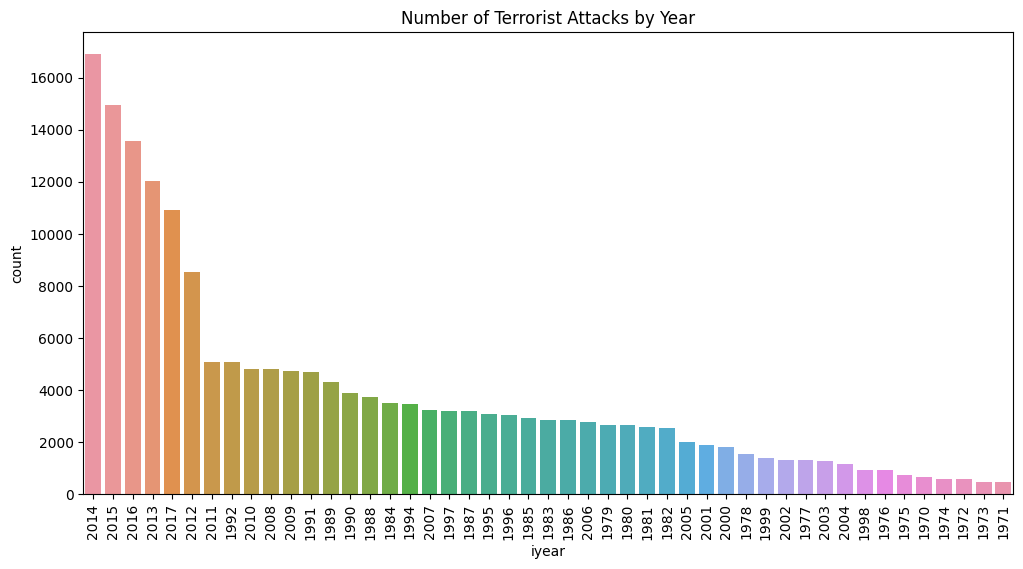

In [31]:
# Example visualization: Distribution of terrorist attacks by year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='iyear', order=df['iyear'].value_counts().index)
plt.title('Number of Terrorist Attacks by Year')
plt.xticks(rotation=90)
plt.show()

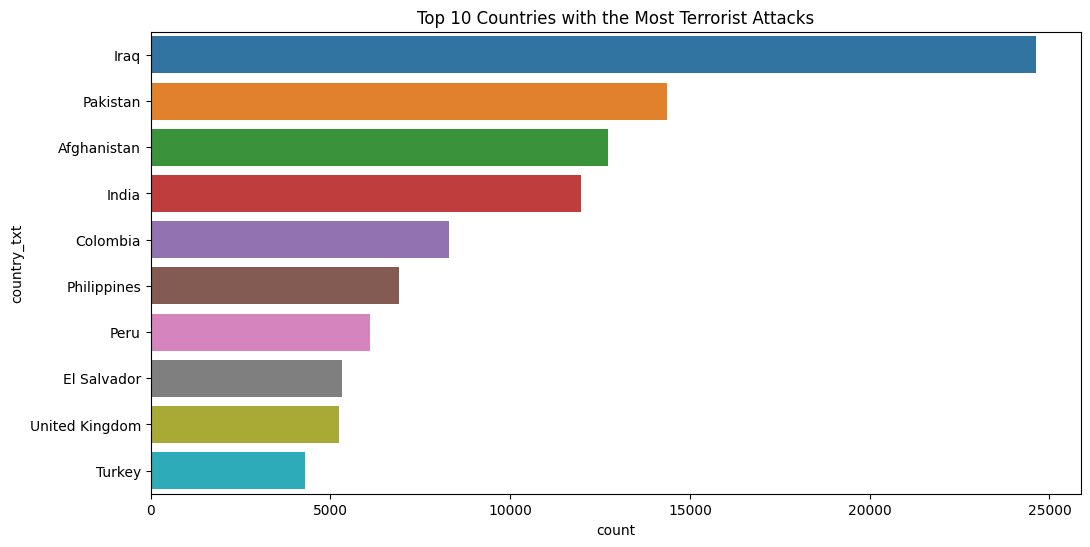

In [33]:
# Example visualization: Top 10 countries with the most terrorist attacks
top_10_countries = df['country_txt'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['country_txt'].isin(top_10_countries)], y='country_txt', order=top_10_countries)
plt.title('Top 10 Countries with the Most Terrorist Attacks')
plt.show()

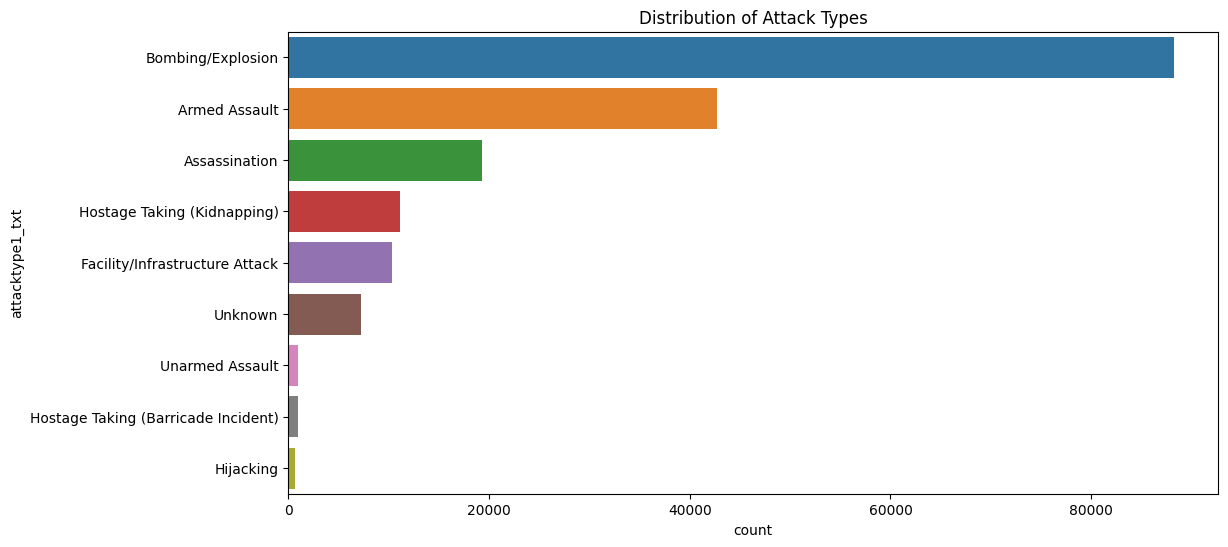

In [34]:
# Example visualization: Distribution of attack types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='attacktype1_txt', order=df['attacktype1_txt'].value_counts().index)
plt.title('Distribution of Attack Types')
plt.show()